In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
os.listdir("/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data")

['train', 'data', 'test']

In [11]:
os.listdir("/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train")

['benign', 'malignant']

In [12]:
ben_dir = "/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train/benign"
malig_dir = "/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train/malignant"

train_dir = "/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train"
test_dir = "/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/test"

In [13]:
print("Number of images in benign folder:",len(os.listdir("/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train/benign")))
print("Number of images in malignant folder:",len(os.listdir("/content/drive/MyDrive/SkinCancer_New_Data/Cancer_New_Data/train/malignant")))

Number of images in benign folder: 1440
Number of images in malignant folder: 1197


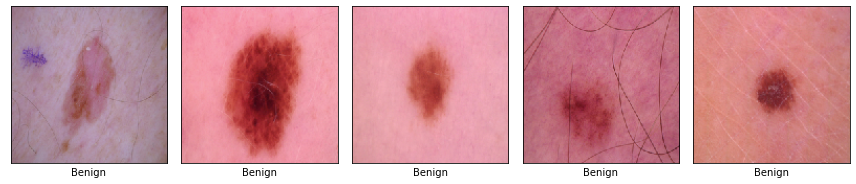

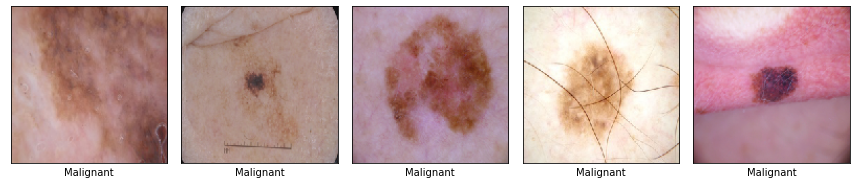

In [14]:
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import load_img
plt.figure(figsize=(12,7))
ben = random.sample(os.listdir(ben_dir),5)
malig = random.sample(os.listdir(malig_dir),5)

for i,img in enumerate(ben):
    path = os.path.join(ben_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Benign")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

plt.figure(figsize=(12,7))
for i,img in enumerate(malig):
    path = os.path.join(malig_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Malignant")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =(1./255),rotation_range=0.2,
    width_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip= True)

val_datagen = ImageDataGenerator(rescale =(1./255))

train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               batch_size =32)
test_data = val_datagen.flow_from_directory(directory = test_dir, 
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               batch_size =32)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


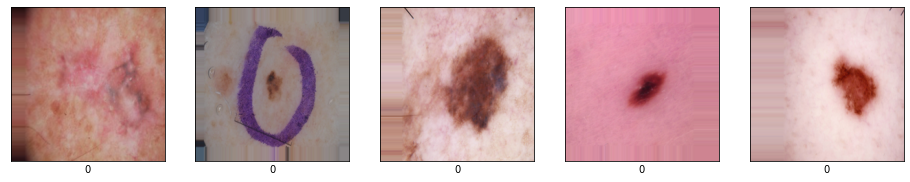

In [16]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_data)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [17]:
from tensorflow.keras.applications import DenseNet121
dense = DenseNet121(weights = "imagenet", include_top = False, input_shape=(224,224,3))

29097984/29084464 [==============================] - 0s 0us/step


In [18]:
for layer in dense.layers[:121]:
    layer.trainable = False

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 1024)       4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 3, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4

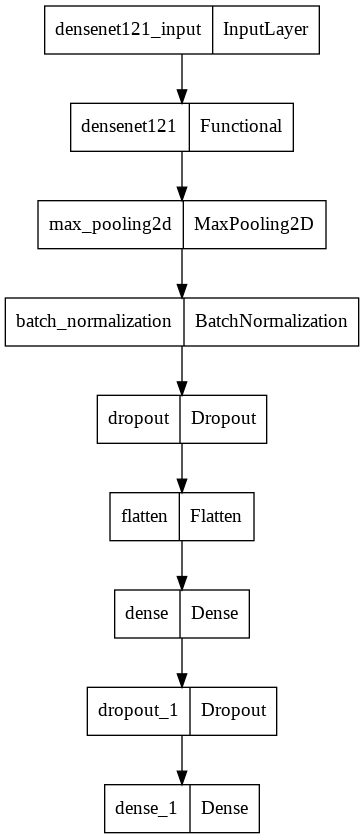

In [21]:
plot_model(model,
    to_file='DenseNet.png',
    show_shapes=False,
    show_layer_names=True)

In [26]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

     |████████████████████████████████| 1.0 MB 9.5 MB/s 
     |████████████████████████████████| 516.2 MB 10 kB/s 
     |████████████████████████████████| 454 kB 71.4 MB/s 
     |████████████████████████████████| 3.0 MB 53.1 MB/s 
     |████████████████████████████████| 2.9 MB 61.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Foun

In [27]:
import tensorflow_addons as tfa
from tensorflow.keras import metrics
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.metrics import MatthewsCorrelationCoefficient
metrics = ['accuracy',
           metrics.Precision(name='precision'),
           metrics.Recall(name='recall'),
           F1Score(num_classes = 1,name = 'f1'),
           MatthewsCorrelationCoefficient(num_classes = 1,name='mc'),
           tf.keras.metrics.TruePositives(name= 'tp'),
           tf.keras.metrics.TrueNegatives(name = 'tn'),
           tf.keras.metrics.FalseNegatives(name = 'fn'),
           tf.keras.metrics.FalsePositives(name = 'fp')
          ]

lr=0.001
model.compile(optimizer = Adam(lr = 0.001), loss = "binary_crossentropy", metrics = metrics)

In [28]:
patience = 1
stop_patience = 3
factor = 0.5
#    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("densenet121.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [29]:
history = model.fit(train_data, validation_data = test_data, epochs = 50, 
                    verbose = 1, callbacks = callbacks )

Epoch 1/50
83/83 [==============================] - 723s 8s/step - loss: 0.4821 - accuracy: 0.8074 - precision: 0.7745 - recall: 0.8120 - f1: 0.6322 - mc: 0.4763 - tp: 972.0000 - tn: 1157.0000 - fn: 225.0000 - fp: 283.0000 - val_loss: 5.9641 - val_accuracy: 0.7030 - val_precision: 0.6368 - val_recall: 0.8067 - val_f1: 0.6950 - val_mc: 0.4693 - val_tp: 242.0000 - val_tn: 222.0000 - val_fn: 58.0000 - val_fp: 138.0000 - lr: 0.0010
Epoch 2/50
83/83 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8464 - precision: 0.8153 - recall: 0.8555 - f1: 0.6534 - mc: 0.4766 - tp: 1024.0000 - tn: 1208.0000 - fn: 173.0000 - fp: 232.0000
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
83/83 [==============================] - 42s 503ms/step - loss: 0.3448 - accuracy: 0.8464 - precision: 0.8153 - recall: 0.8555 - f1: 0.6534 - mc: 0.4766 - tp: 1024.0000 - tn: 1208.0000 - fn: 173.0000 - fp: 232.0000 - val_loss: 75.8156 - val_accuracy: 0.5727 - val_preci

In [30]:
model.save("densenet121.h5")
model.evaluate(test_data)

21/21 [==============================] - 3s 135ms/step - loss: 0.2860 - accuracy: 0.9091 - precision: 0.8822 - recall: 0.9233 - f1: 0.6842 - mc: 0.4873 - tp: 277.0000 - tn: 323.0000 - fn: 23.0000 - fp: 37.0000


[0.2860413193702698,
 0.9090909361839294,
 0.8821656107902527,
 0.9233333468437195,
 array([0.6841505], dtype=float32),
 array([0.48734605], dtype=float32),
 277.0,
 323.0,
 23.0,
 37.0]

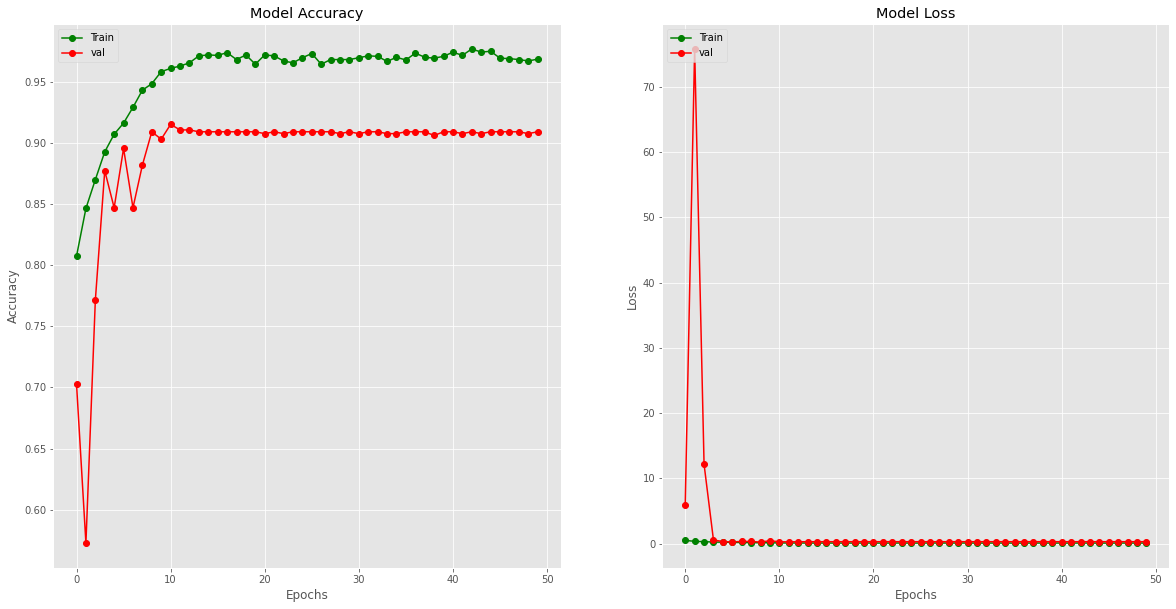

In [67]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(20,8))
epochs = range(50)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")
#plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [38]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

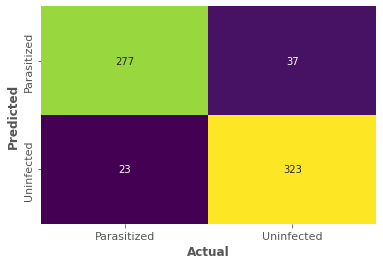

In [39]:
import seaborn as sns
cm_data = [[history.history['val_tp'][-1], history.history['val_fp'][-1]], [history.history['val_fn'][-1], history.history['val_tn'][-1]]]
sns.heatmap(cm_data, annot=True, cmap = 'viridis',cbar = False,fmt = 'g')
plt.xticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.yticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.show()